
 Тип оригинального изображения: <PIL.Image.Image image mode=L size=464x462 at 0x7BE37C9F24D0> 


После преобразования в числовой формат: 

 array([[  9,  34,  37, ...,  37,  41,  33],
       [ 30, 152, 164, ..., 153, 148, 132],
       [ 35, 154, 156, ..., 153, 158, 128],
       ...,
       [ 22, 116, 121, ..., 127, 115,  95],
       [ 24, 112, 120, ..., 127, 115,  95],
       [ 24, 118, 122, ..., 122, 114,  92]], dtype=uint8)

 Входное изображение, конвертированное в полутоновое: 



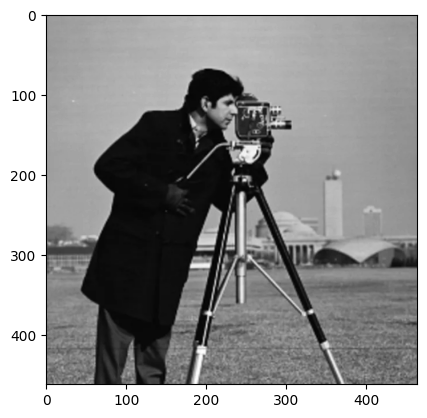

In [ ]:
import numpy as np
from scipy import signal
from scipy import misc
import matplotlib.pyplot as plt
from PIL import Image

im = Image.open('operator.png')
# Конвертируем цветное в полутоновое, используя преобразование ITU-R 601-2 Luma
image_gr = im.convert("L")

print("\n Тип оригинального изображения: %r \n\n" % image_gr)
arr = np.asarray(image_gr)
print("После преобразования в числовой формат: \n\n %r" % arr)
%matplotlib inline

imgplot = plt.imshow(arr)
imgplot.set_cmap('gray')
print("\n Входное изображение, конвертированное в полутоновое: \n")
plt.show(imgplot)

In [ ]:
kernel = np.array([[ 1, 2, 1],
                   [ 0, 0, 0],
                   [ -1, -2, -1],])

grad = signal.convolve2d(arr, kernel, mode='same', boundary='symm')

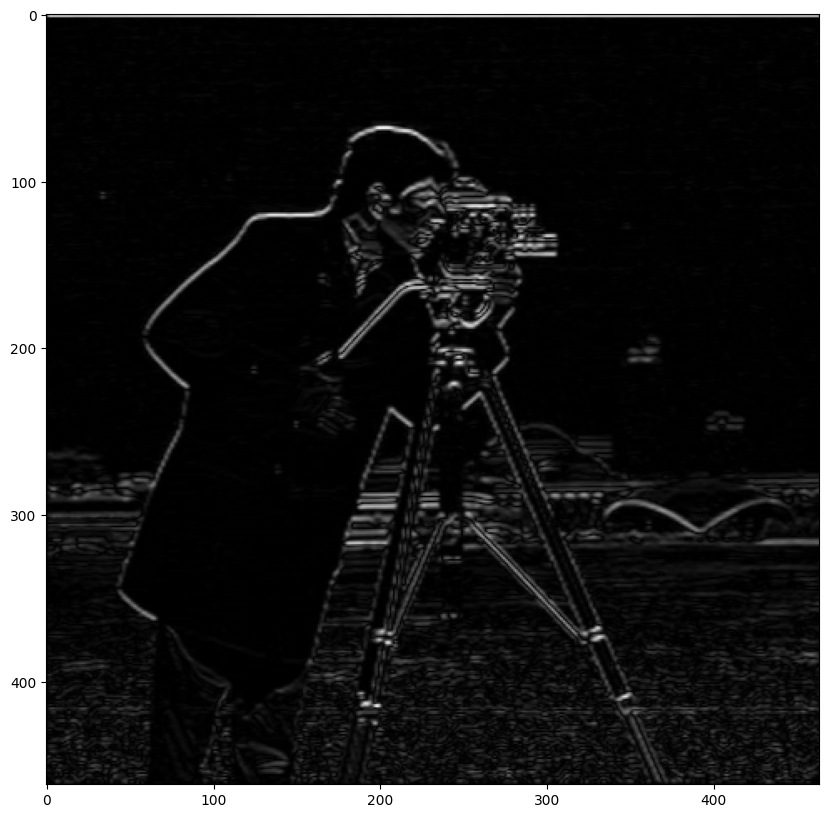

In [ ]:
fig, aux = plt.subplots(figsize=(10, 10))
aux.imshow(np.absolute(grad), cmap='gray')

In [ ]:
kernel = np.array([[-1 ,0, 1],
                   [-2, 0, 2],
                   [-1, 0, 1],])

grad = signal.convolve2d(arr, kernel, mode='same', boundary='symm')

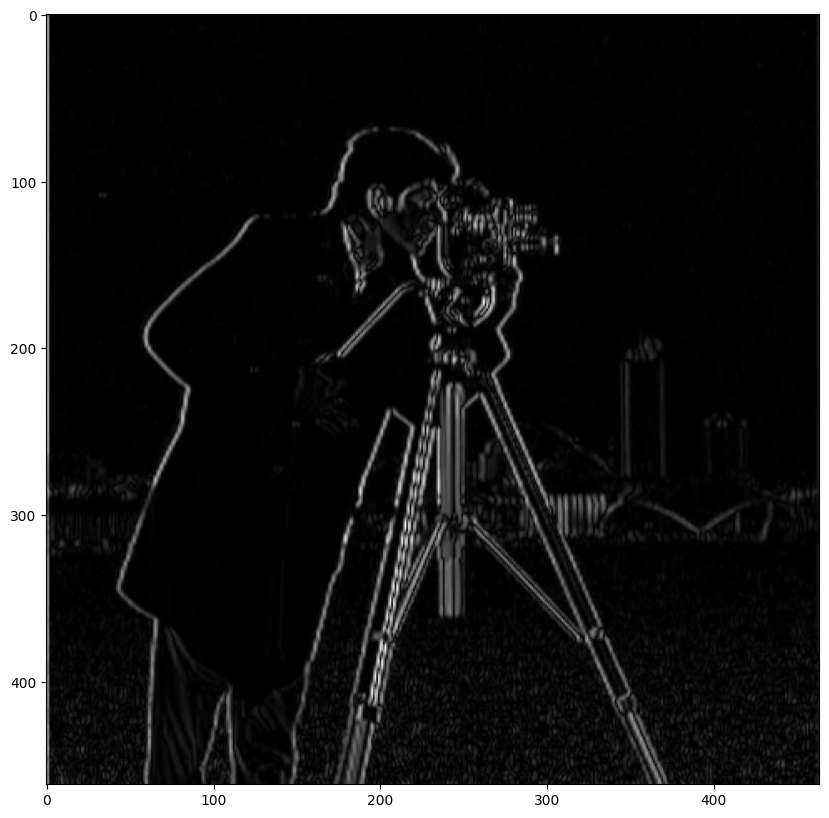

In [ ]:
fig, aux = plt.subplots(figsize=(10, 10))
aux.imshow(np.absolute(grad), cmap='gray')

In [ ]:
kernel = np.array([[-1 ,0, 1],
                   [0, 0, 0],
                   [1, 0, -1],])

grad = signal.convolve2d(arr, kernel, mode='same', boundary='symm')

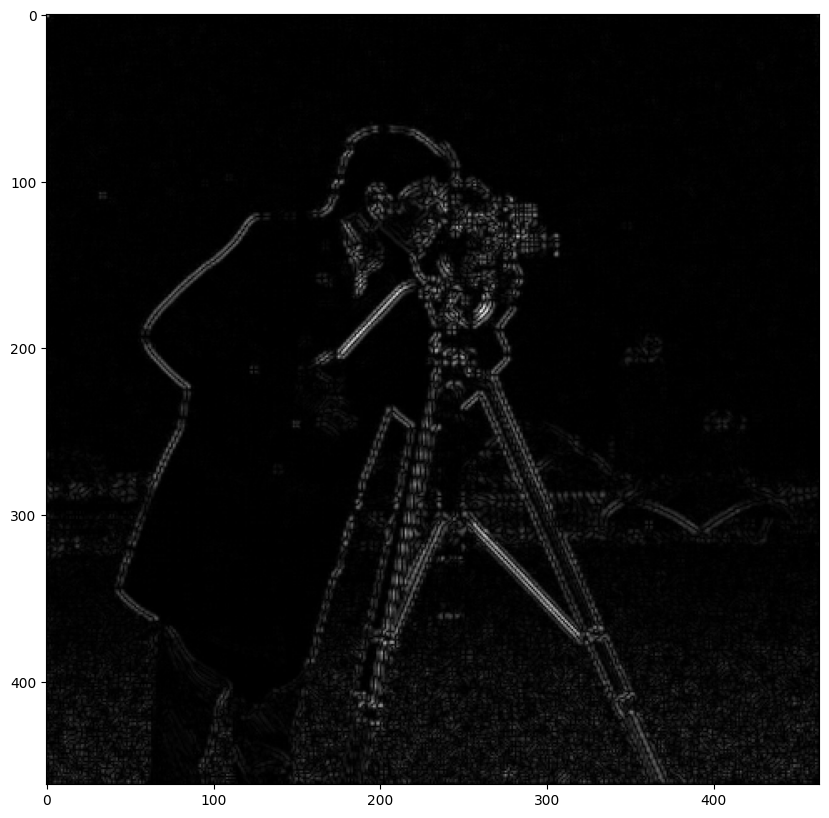

In [ ]:
fig, aux = plt.subplots(figsize=(10, 10))
aux.imshow(np.absolute(grad), cmap='gray')

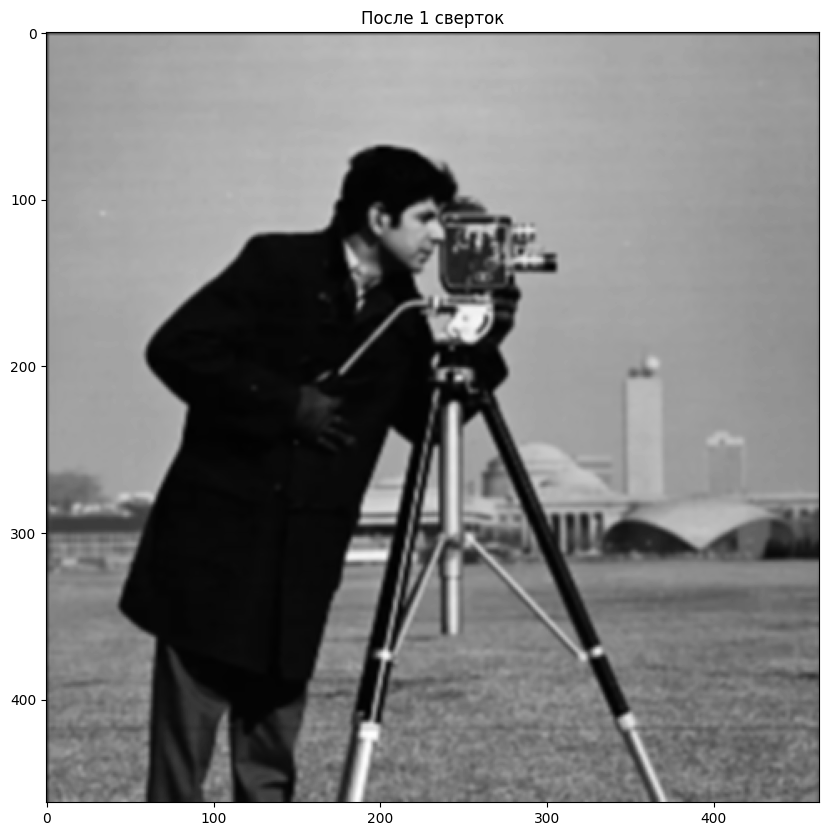

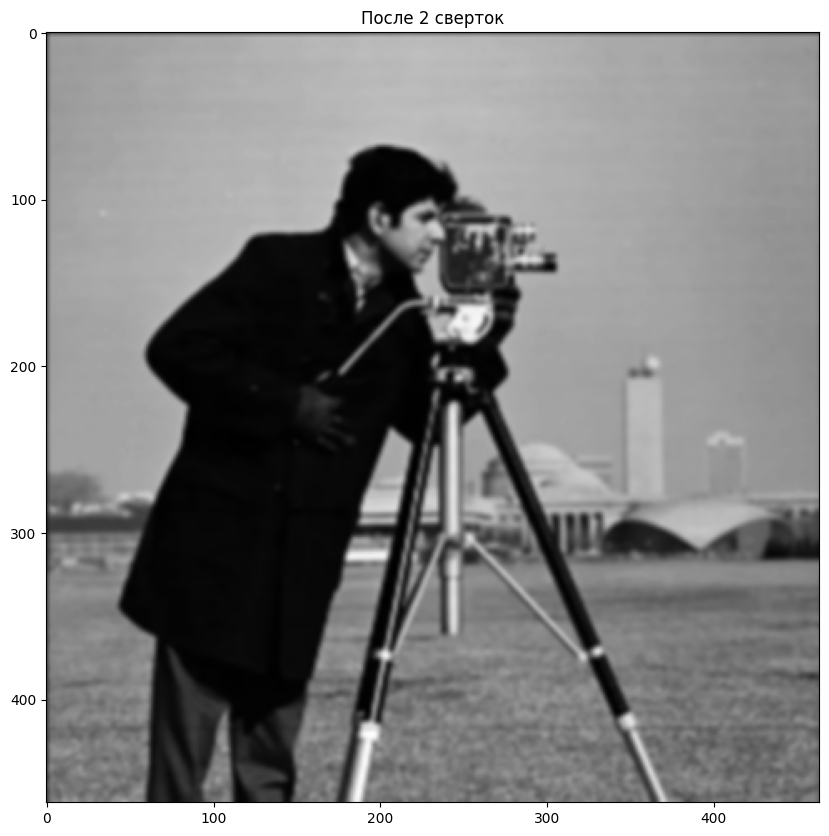

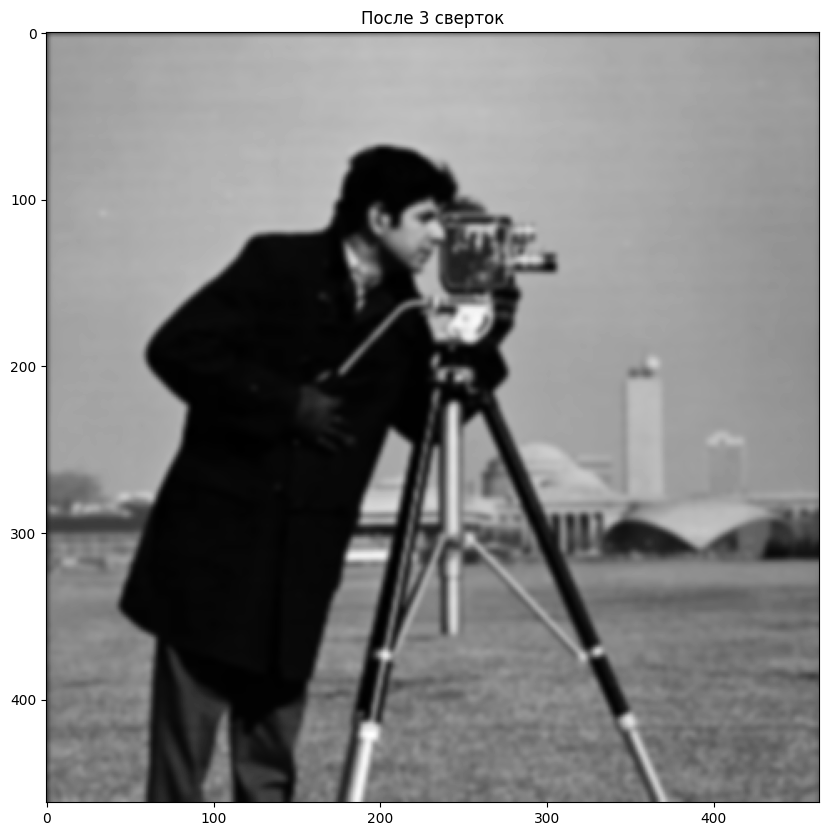

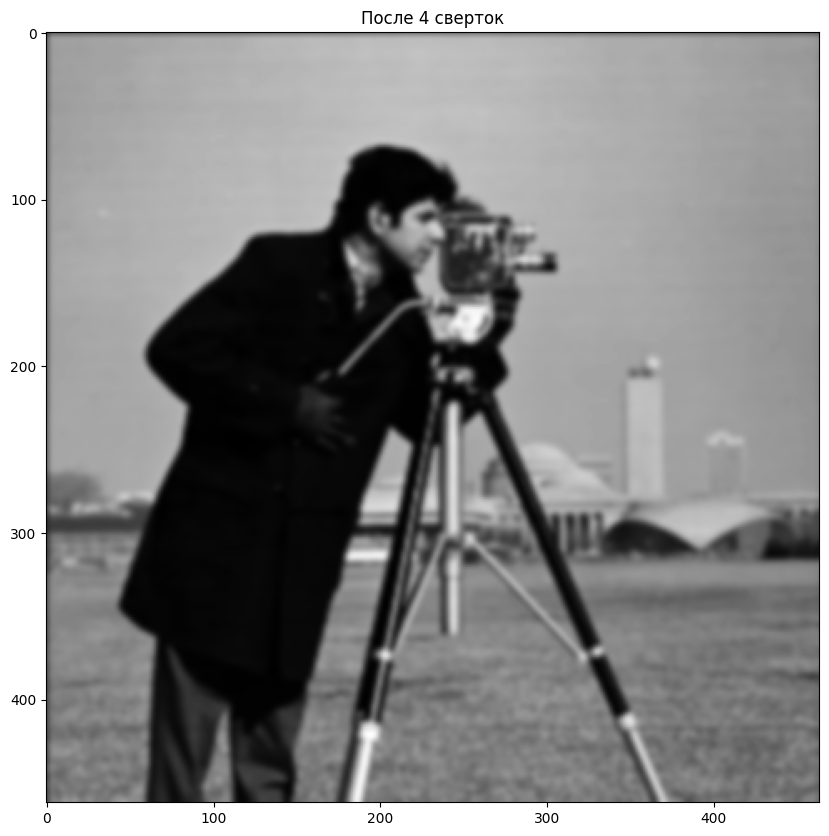

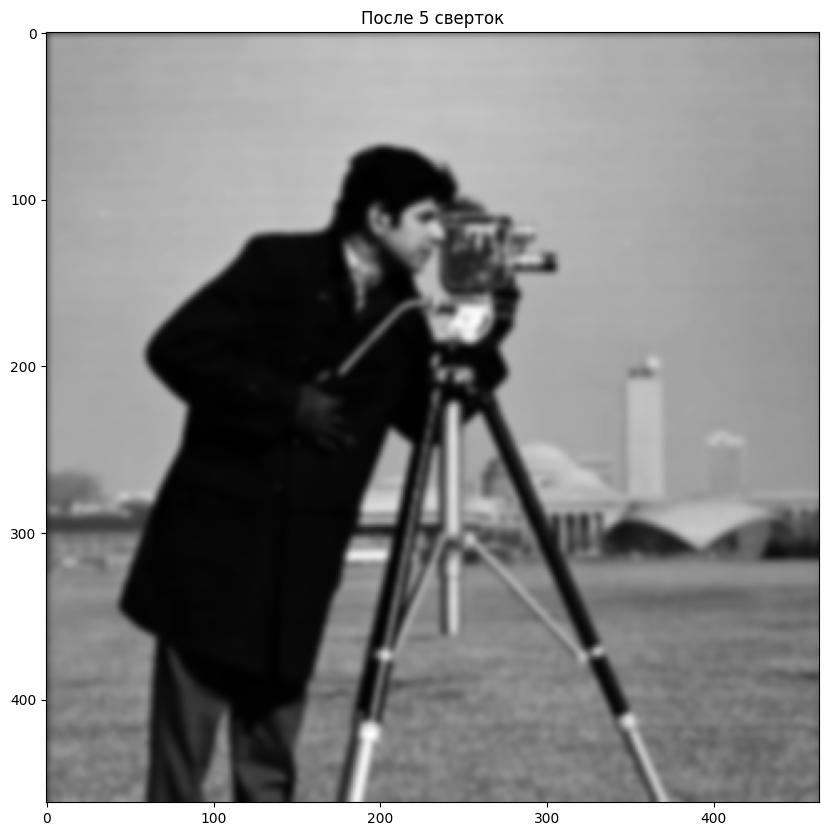

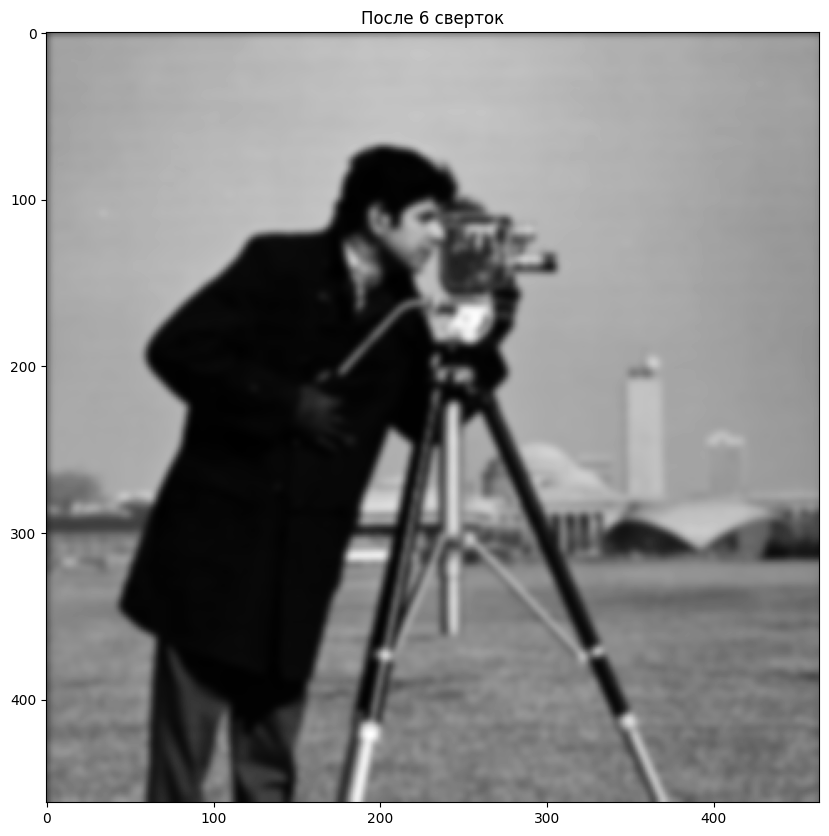

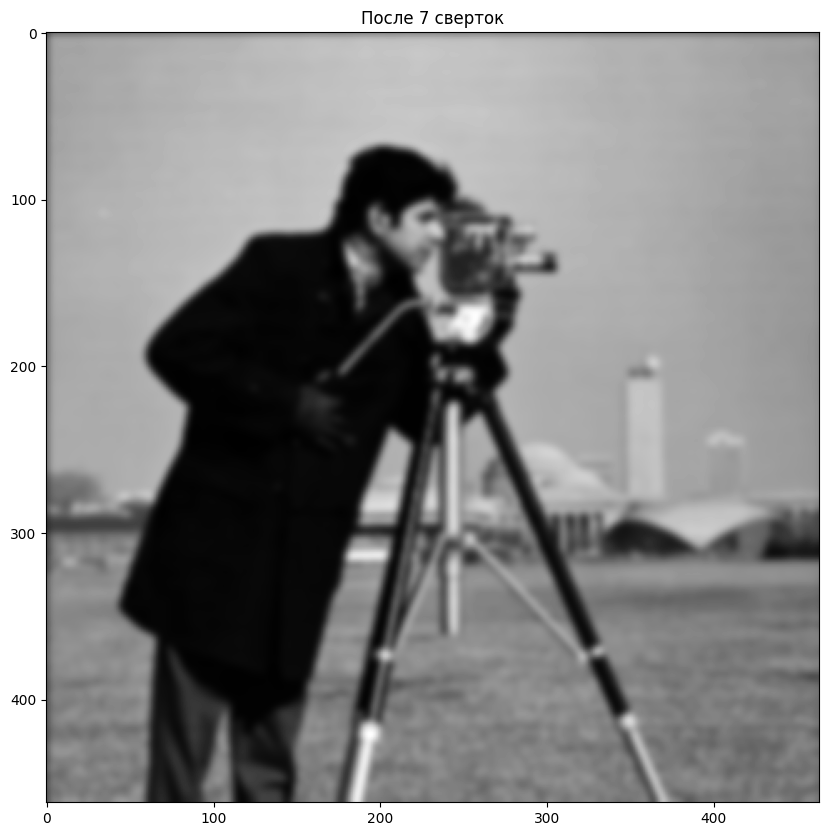

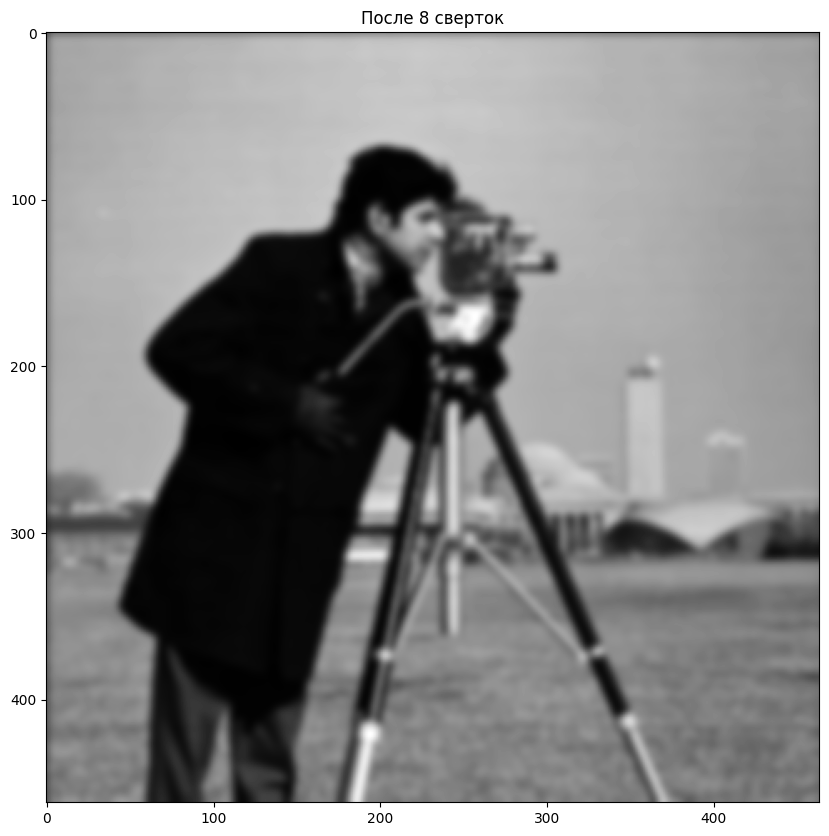

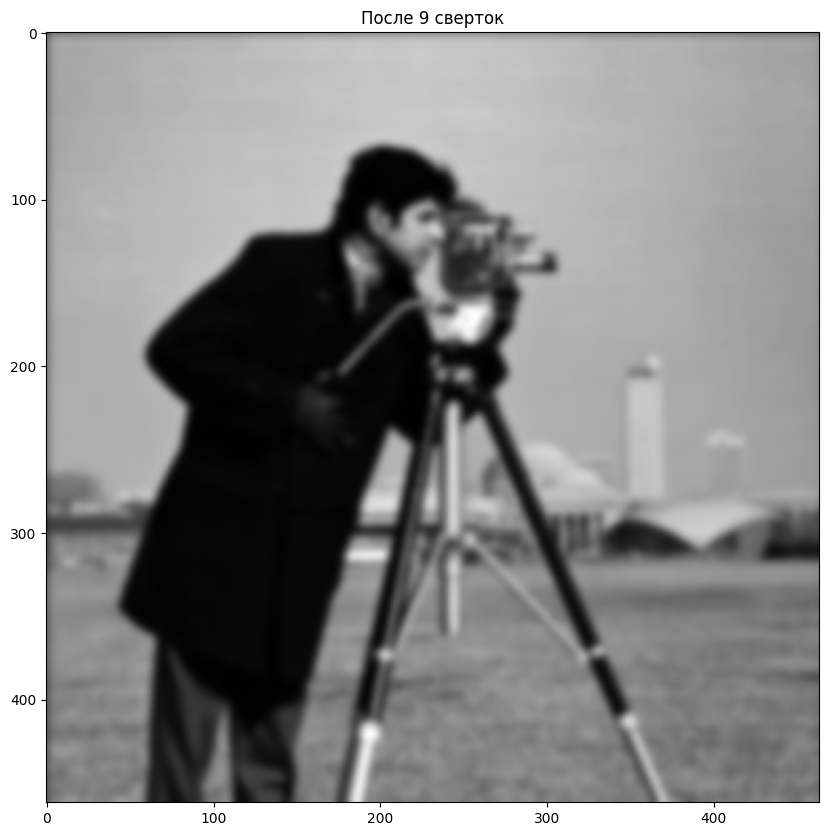

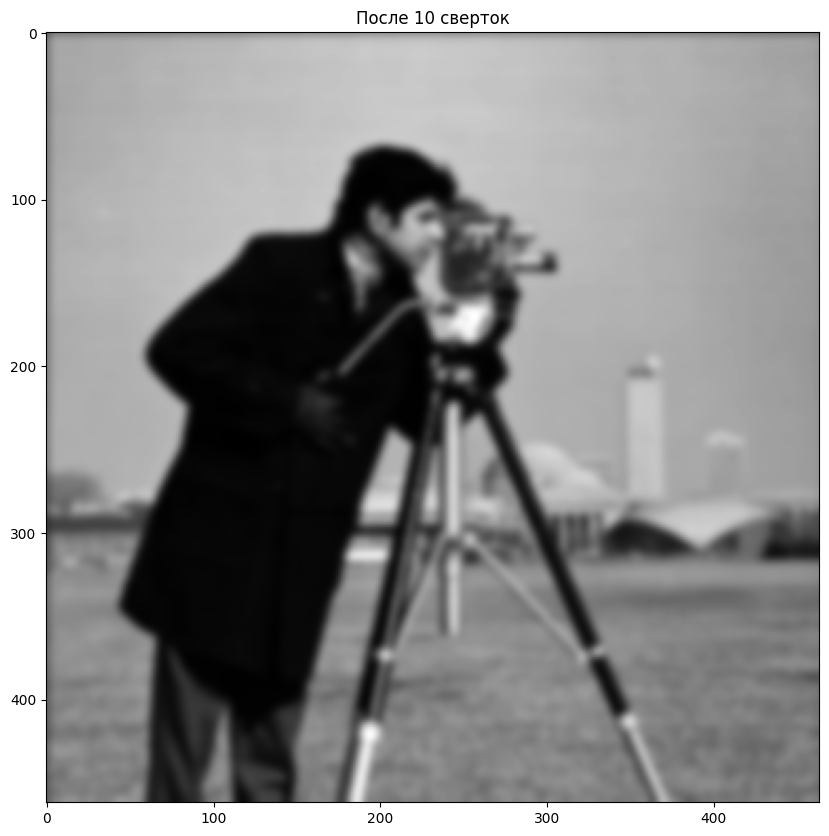

In [ ]:
for i in range(10):
    grad = signal.convolve2d(arr, kernel, mode='same', boundary='symm')
    arr = grad # Обновление исходного изображения для следующей итерации

    # Визуализация промежуточного результата
    fig, aux = plt.subplots(figsize=(10, 10))
    aux.imshow(np.absolute(grad), cmap='gray')
    plt.title(f'После {i+1} сверток')
    plt.show()

# Задание 2

In [ ]:
from numpy import mean
from numpy import std
from matplotlib import pyplot as plt
from sklearn.model_selection import KFold
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.python.keras.utils.vis_utils import plot_model

11490434/11490434 [==============================] - 0s 0us/step
Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


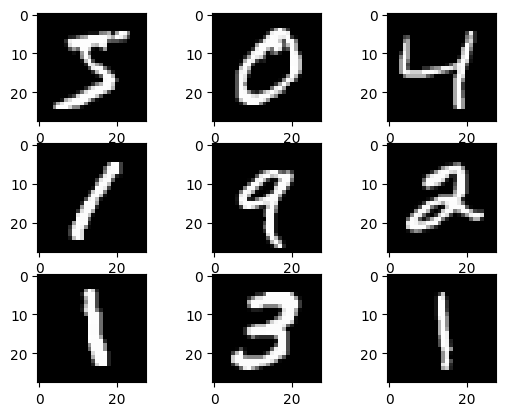

In [ ]:
(trainX, trainy), (testX, testy) = mnist.load_data()
# Посмотрим, что там
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))
# Выведем первые несколько изображений
for i in range(9):
    plt.subplot(330 + 1 + i)
    # Покажем пиксети как есть
    plt.imshow(trainX[i], cmap=plt.get_cmap('gray'))

plt.show()

In [ ]:
# Загрузка набора данных
def load_dataset():
    (trainX, trainY), (testX, testY) = mnist.load_data()
    # Меняем форму, чтобы набор был одноканальным
    trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
    testX = testX.reshape((testX.shape[0], 28, 28, 1))
    # применяем унитарное кодирование к размеченным выходам
    trainY = to_categorical(trainY)
    testY = to_categorical(testY)
    return trainX, trainY, testX, testY

In [ ]:
# Масштабирование
def prep_pixels(train, test):
    # Конвертируем в вещественные значения
    train_norm = train.astype('float32')
    test_norm = test.astype('float32')
    # Приводим яркости к диапазону [0; 1]
    train_norm = train_norm / 255.0
    test_norm = test_norm / 255.0
    return train_norm, test_norm

In [ ]:
# Построение модели CNN
def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D((2, 2))) #уплотнение
    model.add(Flatten()) #преобразование
    model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(10, activation='softmax'))
    # compile model
    opt = SGD(learning_rate=0.01, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
model = define_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 100)               540900    
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 542230 (2.07 MB)
Trainable params: 542230 (2.07 MB)
Non-trainable params: 0 (0.00 Byte)
____________________

In [ ]:
# Построим и оценим модель, используя k-fold кросс-валидацию
def evaluate_model(dataX, dataY, n_folds=5):
    scores, histories = list(), list()
    # Настраиваем кросс-валидацию
    kfold = KFold(n_folds, shuffle=True, random_state=1)
    # Обходим все разбиения
    for train_ix, test_ix in kfold.split(dataX):
        # Строим модель
        model = define_model()
        # Получаем данные для обучающей и проверочной выборки
        trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
        # Учим модель - это не очень быстро на старых ПК, но за несколько минут отработает
        history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY), verbose=0)
        # Оцениваем модель
        _, acc = model.evaluate(testX, testY, verbose=1)
        print('> %.3f' % (acc * 100.0))
        # Сохраняем статистику - пригодится для построения графиков
        scores.append(acc)
        histories.append(history)

    return scores, histories

In [ ]:
# Строим кривые обучения для диагностики
def summarize_diagnostics(histories):
    for i in range(len(histories)):
        # plot loss
        plt.subplot(2, 1, 1)
        plt.title('Cross Entropy Loss')
        plt.plot(histories[i].history['loss'], color='blue', label='train')
        plt.plot(histories[i].history['val_loss'], color='orange', label='test')
        # plot accuracy
        plt.subplot(2, 1, 2)
        plt.title('Classification Accuracy')
        plt.plot(histories[i].history['accuracy'], color='blue', label='train')
        plt.plot(histories[i].history['val_accuracy'], color='orange', label='test')
    plt.show()

In [ ]:
# Подбиваем итоги по результатам
def summarize_performance(scores):
    # Выводим статистику
    print('Accuracy: mean=%.3f std=%.3f, n=%d' % (mean(scores)*100, std(scores)*100, len(scores)))
    # Строим графики (коробочный график и "усы")
    plt.boxplot(scores)
    plt.show()

375/375 [==============================] - 2s 5ms/step - loss: 0.0545 - accuracy: 0.9872
> 98.717
375/375 [==============================] - 2s 5ms/step - loss: 0.0500 - accuracy: 0.9861
> 98.608
375/375 [==============================] - 2s 6ms/step - loss: 0.0580 - accuracy: 0.9855
> 98.550
375/375 [==============================] - 2s 5ms/step - loss: 0.0418 - accuracy: 0.9889
> 98.892
375/375 [==============================] - 2s 6ms/step - loss: 0.0570 - accuracy: 0.9871
> 98.708


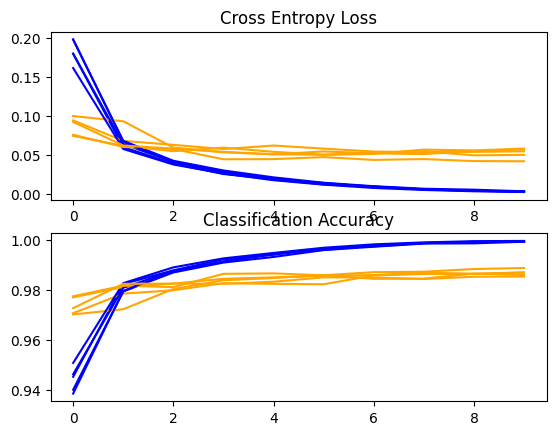

Accuracy: mean=98.695 std=0.117, n=5


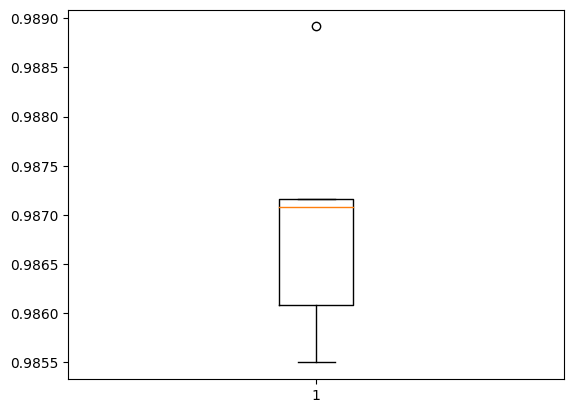

In [ ]:
# Запускаем процесс - это главная функция
def run():
    # Грузим данные
    trainX, trainY, testX, testY = load_dataset()
    # Нормализуем изображения для Tensorflow и нейросети
    trainX, testX = prep_pixels(trainX, testX)
    # Строим и оцениваем модель
    scores, histories = evaluate_model(trainX, trainY)
    # Строим кривые обучения
    summarize_diagnostics(histories)
    # Считаем агрегированную статистику
    summarize_performance(scores)


# Точка входа - 3... 2... 1... Поехали!
run()

# Добавление слоя батч-нормализации

In [ ]:
from tensorflow.keras.layers import BatchNormalization

In [ ]:
# Построение модели CNN
def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
    model.add(BatchNormalization()) # Добавление слоя батч-нормализации
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(10, activation='softmax'))
    # compile model
    opt = SGD(learning_rate=0.01, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
model = define_model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 batch_normalization (Batch  (None, 26, 26, 32)        128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 100)               540900    
                                                                 
 dense_1 (Dense)             (None, 10)               

In [ ]:
# Построим и оценим модель, используя k-fold кросс-валидацию
def evaluate_model(dataX, dataY, n_folds=5):
    scores, histories = list(), list()
    # Настраиваем кросс-валидацию
    kfold = KFold(n_folds, shuffle=True, random_state=1)
    # Обходим все разбиения
    for train_ix, test_ix in kfold.split(dataX):
        # Строим модель
        model = define_model()
        # Получаем данные для обучающей и проверочной выборки
        trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
        # Учим модель - это не очень быстро на старых ПК, но за несколько минут отработает
        history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY), verbose=0)
        # Оцениваем модель
        _, acc = model.evaluate(testX, testY, verbose=1)
        print('> %.3f' % (acc * 100.0))
        # Сохраняем статистику - пригодится для построения графиков
        scores.append(acc)
        histories.append(history)

    return scores, histories

In [ ]:
# Строим кривые обучения для диагностики
def summarize_diagnostics(histories):
    for i in range(len(histories)):
        # plot loss
        plt.subplot(2, 1, 1)
        plt.title('Cross Entropy Loss')
        plt.plot(histories[i].history['loss'], color='blue', label='train')
        plt.plot(histories[i].history['val_loss'], color='orange', label='test')
        # plot accuracy
        plt.subplot(2, 1, 2)
        plt.title('Classification Accuracy')
        plt.plot(histories[i].history['accuracy'], color='blue', label='train')
        plt.plot(histories[i].history['val_accuracy'], color='orange', label='test')
    plt.show()

In [ ]:
# Подбиваем итоги по результатам
def summarize_performance(scores):
    # Выводим статистику
    print('Accuracy: mean=%.3f std=%.3f, n=%d' % (mean(scores)*100, std(scores)*100, len(scores)))
    # Строим графики (коробочный график и "усы")
    plt.boxplot(scores)
    plt.show()

In [ ]:
# Запускаем процесс - это главная функция
def run():
    # Грузим данные
    trainX, trainY, testX, testY = load_dataset()
    # Нормализуем изображения для Tensorflow и нейросети
    trainX, testX = prep_pixels(trainX, testX)
    # Строим и оцениваем модель
    scores, histories = evaluate_model(trainX, trainY)
    # Строим кривые обучения
    summarize_diagnostics(histories)
    # Считаем агрегированную статистику
    summarize_performance(scores)


# Точка входа - 3... 2... 1... Поехали!
run()

# Увеличение размеров карт активации

In [ ]:
# Построение модели CNN
def define_model():
    model = Sequential()
    model.add(Conv2D(32, (5, 5), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(10, activation='softmax'))
    # compile model
    opt = SGD(learning_rate=0.01, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
model = define_model()
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 12, 12, 32)        0         
 ng2D)                                                           
                                                                 
 flatten_12 (Flatten)        (None, 4608)              0         
                                                                 
 dense_24 (Dense)            (None, 100)               460900    
                                                                 
 dense_25 (Dense)            (None, 10)                1010      
                                                                 
Total params: 462742 (1.77 MB)
Trainable params: 462742 (1.77 MB)
Non-trainable params: 0 (0.00 Byte)
_________________

In [ ]:
# Построим и оценим модель, используя k-fold кросс-валидацию
def evaluate_model(dataX, dataY, n_folds=5):
    scores, histories = list(), list()
    # Настраиваем кросс-валидацию
    kfold = KFold(n_folds, shuffle=True, random_state=1)
    # Обходим все разбиения
    for train_ix, test_ix in kfold.split(dataX):
        # Строим модель
        model = define_model()
        # Получаем данные для обучающей и проверочной выборки
        trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
        # Учим модель - это не очень быстро на старых ПК, но за несколько минут отработает
        history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY), verbose=0)
        # Оцениваем модель
        _, acc = model.evaluate(testX, testY, verbose=1)
        print('> %.3f' % (acc * 100.0))
        # Сохраняем статистику - пригодится для построения графиков
        scores.append(acc)
        histories.append(history)

    return scores, histories

In [ ]:
# Строим кривые обучения для диагностики
def summarize_diagnostics(histories):
    for i in range(len(histories)):
        # plot loss
        plt.subplot(2, 1, 1)
        plt.title('Cross Entropy Loss')
        plt.plot(histories[i].history['loss'], color='blue', label='train')
        plt.plot(histories[i].history['val_loss'], color='orange', label='test')
        # plot accuracy
        plt.subplot(2, 1, 2)
        plt.title('Classification Accuracy')
        plt.plot(histories[i].history['accuracy'], color='blue', label='train')
        plt.plot(histories[i].history['val_accuracy'], color='orange', label='test')
    plt.show()

In [ ]:
# Подбиваем итоги по результатам
def summarize_performance(scores):
    # Выводим статистику
    print('Accuracy: mean=%.3f std=%.3f, n=%d' % (mean(scores)*100, std(scores)*100, len(scores)))
    # Строим графики (коробочный график и "усы")
    plt.boxplot(scores)
    plt.show()

375/375 [==============================] - 2s 6ms/step - loss: 0.0539 - accuracy: 0.9877
> 98.775
375/375 [==============================] - 2s 6ms/step - loss: 0.0421 - accuracy: 0.9887
> 98.875
375/375 [==============================] - 3s 8ms/step - loss: 0.0516 - accuracy: 0.9876
> 98.758
375/375 [==============================] - 2s 6ms/step - loss: 0.0337 - accuracy: 0.9904
> 99.042
375/375 [==============================] - 2s 6ms/step - loss: 0.0478 - accuracy: 0.9886
> 98.858


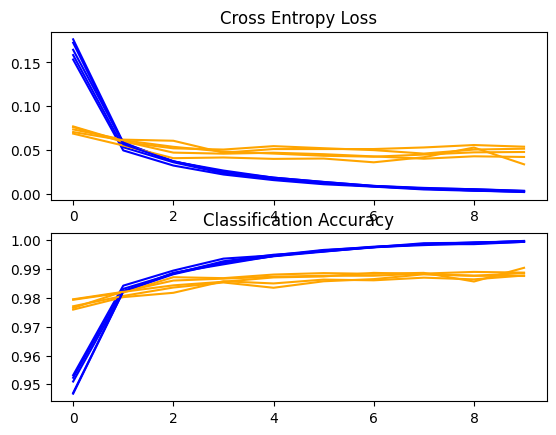

Accuracy: mean=98.862 std=0.101, n=5


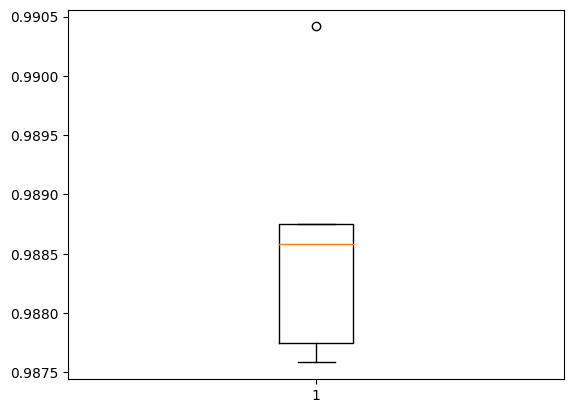

In [ ]:
# Запускаем процесс - это главная функция
def run():
    # Грузим данные
    trainX, trainY, testX, testY = load_dataset()
    # Нормализуем изображения для Tensorflow и нейросети
    trainX, testX = prep_pixels(trainX, testX)
    # Строим и оцениваем модель
    scores, histories = evaluate_model(trainX, trainY)
    # Строим кривые обучения
    summarize_diagnostics(histories)
    # Считаем агрегированную статистику
    summarize_performance(scores)


# Точка входа - 3... 2... 1... Поехали!
run()

In [ ]:
def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (5, 5), activation='relu', kernel_initializer='he_uniform'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(10, activation='softmax'))
    # compile model
    opt = SGD(learning_rate=0.01, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
model = define_model()
model.summary()

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_33 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_32 (MaxPooli  (None, 13, 13, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_34 (Conv2D)          (None, 9, 9, 64)          51264     
                                                                 
 max_pooling2d_33 (MaxPooli  (None, 4, 4, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_35 (Conv2D)          (None, 2, 2, 64)          36928     
                                                                 
 max_pooling2d_34 (MaxPooli  (None, 1, 1, 64)        

In [ ]:
# Построим и оценим модель, используя k-fold кросс-валидацию
def evaluate_model(dataX, dataY, n_folds=5):
    scores, histories = list(), list()
    # Настраиваем кросс-валидацию
    kfold = KFold(n_folds, shuffle=True, random_state=1)
    # Обходим все разбиения
    for train_ix, test_ix in kfold.split(dataX):
        # Строим модель
        model = define_model()
        # Получаем данные для обучающей и проверочной выборки
        trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
        # Учим модель - это не очень быстро на старых ПК, но за несколько минут отработает
        history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY), verbose=0)
        # Оцениваем модель
        _, acc = model.evaluate(testX, testY, verbose=1)
        print('> %.3f' % (acc * 100.0))
        # Сохраняем статистику - пригодится для построения графиков
        scores.append(acc)
        histories.append(history)

    return scores, histories

In [ ]:
# Строим кривые обучения для диагностики
def summarize_diagnostics(histories):
    for i in range(len(histories)):
        # plot loss
        plt.subplot(2, 1, 1)
        plt.title('Cross Entropy Loss')
        plt.plot(histories[i].history['loss'], color='blue', label='train')
        plt.plot(histories[i].history['val_loss'], color='orange', label='test')
        # plot accuracy
        plt.subplot(2, 1, 2)
        plt.title('Classification Accuracy')
        plt.plot(histories[i].history['accuracy'], color='blue', label='train')
        plt.plot(histories[i].history['val_accuracy'], color='orange', label='test')
    plt.show()

In [ ]:
# Подбиваем итоги по результатам
def summarize_performance(scores):
    # Выводим статистику
    print('Accuracy: mean=%.3f std=%.3f, n=%d' % (mean(scores)*100, std(scores)*100, len(scores)))
    # Строим графики (коробочный график и "усы")
    plt.boxplot(scores)
    plt.show()

375/375 [==============================] - 2s 6ms/step - loss: 0.0539 - accuracy: 0.9866
> 98.658
375/375 [==============================] - 2s 5ms/step - loss: 0.0498 - accuracy: 0.9872
> 98.717
375/375 [==============================] - 3s 7ms/step - loss: 0.0503 - accuracy: 0.9874
> 98.742
375/375 [==============================] - 3s 7ms/step - loss: 0.0436 - accuracy: 0.9892
> 98.917
375/375 [==============================] - 2s 6ms/step - loss: 0.0392 - accuracy: 0.9902
> 99.017


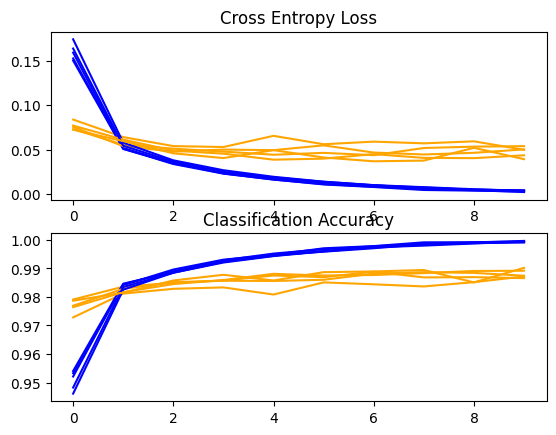

Accuracy: mean=98.810 std=0.135, n=5


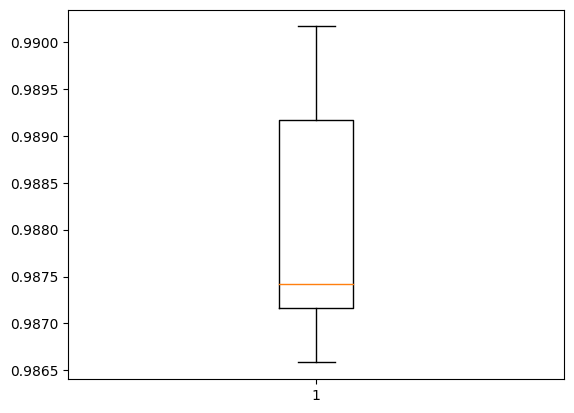

In [ ]:
# Запускаем процесс - это главная функция
def run():
    # Грузим данные
    trainX, trainY, testX, testY = load_dataset()
    # Нормализуем изображения для Tensorflow и нейросети
    trainX, testX = prep_pixels(trainX, testX)
    # Строим и оцениваем модель
    scores, histories = evaluate_model(trainX, trainY)
    # Строим кривые обучения
    summarize_diagnostics(histories)
    # Считаем агрегированную статистику
    summarize_performance(scores)


# Точка входа - 3... 2... 1... Поехали!
run()

# Задание 3

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (5, 5), activation='relu', kernel_initializer='he_uniform'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(10, activation='softmax')) # Убедитесь, что это соответствует количеству классов
    opt = SGD(learning_rate=0.01, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
model = define_model()
model.summary()

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_35 (MaxPooli  (None, 13, 13, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_37 (Conv2D)          (None, 9, 9, 64)          51264     
                                                                 
 max_pooling2d_36 (MaxPooli  (None, 4, 4, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_38 (Conv2D)          (None, 2, 2, 64)          36928     
                                                                 
 max_pooling2d_37 (MaxPooli  (None, 1, 1, 64)        

In [ ]:
# Построим и оценим модель, используя k-fold кросс-валидацию
def evaluate_model(dataX, dataY, n_folds=5):
    scores, histories = list(), list()
    # Настраиваем кросс-валидацию
    kfold = KFold(n_folds, shuffle=True, random_state=1)
    # Обходим все разбиения
    for train_ix, test_ix in kfold.split(dataX):
        # Строим модель
        model = define_model()
        # Получаем данные для обучающей и проверочной выборки
        trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
        # Учим модель - это не очень быстро на старых ПК, но за несколько минут отработает
        history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY), verbose=0)
        # Оцениваем модель
        _, acc = model.evaluate(testX, testY, verbose=1)
        print('> %.3f' % (acc * 100.0))
        # Сохраняем статистику - пригодится для построения графиков
        scores.append(acc)
        histories.append(history)

    return scores, histories

In [ ]:
# Строим кривые обучения для диагностики
def summarize_diagnostics(histories):
    for i in range(len(histories)):
        # plot loss
        plt.subplot(2, 1, 1)
        plt.title('Cross Entropy Loss')
        plt.plot(histories[i].history['loss'], color='blue', label='train')
        plt.plot(histories[i].history['val_loss'], color='orange', label='test')
        # plot accuracy
        plt.subplot(2, 1, 2)
        plt.title('Classification Accuracy')
        plt.plot(histories[i].history['accuracy'], color='blue', label='train')
        plt.plot(histories[i].history['val_accuracy'], color='orange', label='test')
    plt.show()

In [ ]:
# Подбиваем итоги по результатам
def summarize_performance(scores):
    # Выводим статистику
    print('Accuracy: mean=%.3f std=%.3f, n=%d' % (mean(scores)*100, std(scores)*100, len(scores)))
    # Строим графики (коробочный график и "усы")
    plt.boxplot(scores)
    plt.show()

375/375 [==============================] - 5s 14ms/step - loss: 0.0751 - accuracy: 0.9826
> 98.258
375/375 [==============================] - 5s 13ms/step - loss: 0.0599 - accuracy: 0.9858
> 98.583
375/375 [==============================] - 4s 11ms/step - loss: 0.0558 - accuracy: 0.9872
> 98.717
375/375 [==============================] - 4s 12ms/step - loss: 0.0355 - accuracy: 0.9908
> 99.075
375/375 [==============================] - 4s 11ms/step - loss: 0.0451 - accuracy: 0.9882
> 98.817


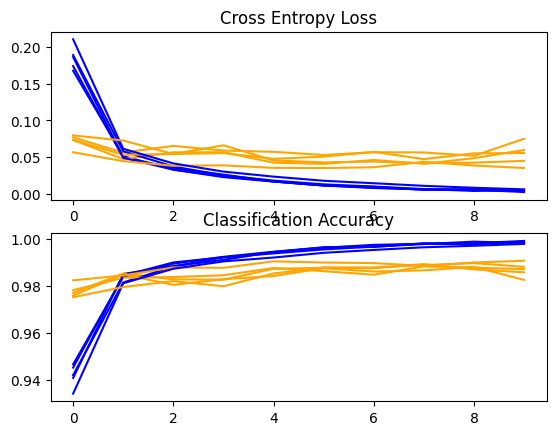

Accuracy: mean=98.690 std=0.269, n=5


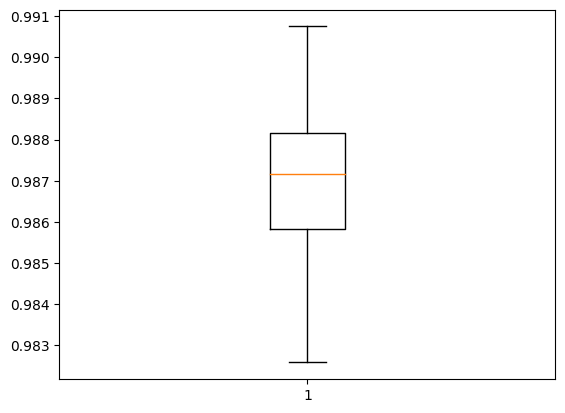

In [ ]:
# Запускаем процесс - это главная функция
def run():
    # Грузим данные
    trainX, trainY, testX, testY = load_dataset()
    # Нормализуем изображения для Tensorflow и нейросети
    trainX, testX = prep_pixels(trainX, testX)
    # Строим и оцениваем модель
    scores, histories = evaluate_model(trainX, trainY)
    # Строим кривые обучения
    summarize_diagnostics(histories)
    # Считаем агрегированную статистику
    summarize_performance(scores)


# Точка входа - 3... 2... 1... Поехали!
run()